# House Prices Analysis

## Hypothesis before graphs

Based on my previous knowlege of real estate and research, the type of dwelling and lot area will make a huge impact on the Sale Price.

1. Univariate Analysis
- How many different types of dwellings are there?
- What is the lot area (sq ft) of these dwellings?
- What is the distribution of sale prices?

2. Bivariate Analysis 
- How does the type of dwelling effect the sale price?
- How does the lot area effect the sale price?

3. Multivariate Analysis
- What numeric features correlate with sale price?
- What features should I use to predict sale price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv("/Users/sa17/Desktop/house-prices-regression/data/train.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.shape

(1460, 81)

In [6]:
null_values = train_df.isna().sum()

null_values[null_values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Dropping Alley, MasVnrType, FireplaceQu, PoolQC, Fence, and MiscFeature due to majority of the values being null

In [7]:
# Dropping columns with majority null values
train_df = train_df.drop(columns=["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])

## 1. Univariate Analysis


How many different types of dwellings are there?

In [8]:
dwelling = train_df["MSSubClass"].value_counts()

dwelling

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [9]:
# Rename value to its actual name for better clarity 
ms_subclass = {
    20: "1-STORY 1946+",  
    30: "1-STORY PRE-1946",
    40: "1-STORY W/FINISHED ATTIC",
    45: "1-1/2 STORY UNFINISHED",
    50: "1-1/2 STORY FINISHED",
    60: "2-STORY 1946+",
    70: "2-STORY PRE-1946",
    75: "2-1/2 STORY",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX",
    120: "1-STORY PUD 1946+",
    150: "1-1/2 STORY PUD",
    160: "2-STORY PUD 1946+",
    180: "PUD - MULTILEVEL",
    190: "2 FAMILY CONVERSION"
}

# Add it as a new column to the dataframe 
train_df["MSSubClassName"] = train_df["MSSubClass"].map(ms_subclass)

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClassName
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2-STORY 1946+
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1-STORY 1946+
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2-STORY 1946+
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,2-STORY PRE-1946
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2-STORY 1946+


In [10]:
dwelling = train_df["MSSubClassName"].value_counts()

dwelling

MSSubClassName
1-STORY 1946+               536
2-STORY 1946+               299
1-1/2 STORY FINISHED        144
1-STORY PUD 1946+            87
1-STORY PRE-1946             69
2-STORY PUD 1946+            63
2-STORY PRE-1946             60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT FOYER                  20
2-1/2 STORY                  16
1-1/2 STORY UNFINISHED       12
PUD - MULTILEVEL             10
1-STORY W/FINISHED ATTIC      4
Name: count, dtype: int64

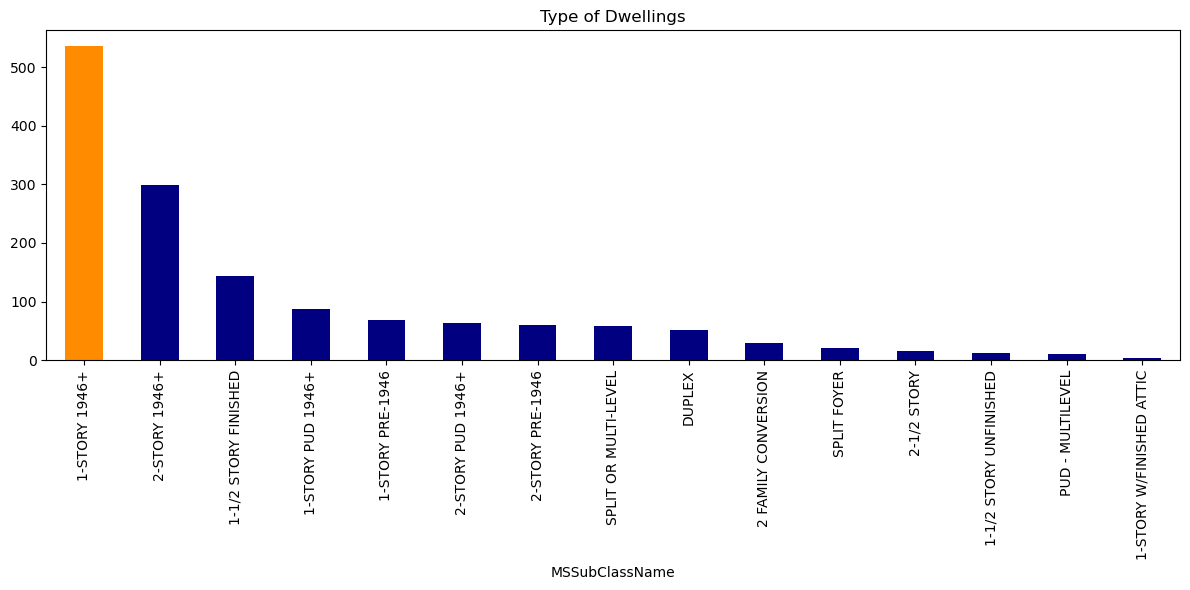

In [11]:
max_type = dwelling.max()

# Assign colors: orange for the max value, blue for others
colors = ["darkorange" if count == max_type else "navy" for count in dwelling]

# Plot the types of dwellings
plt.figure(figsize=(12, 6))
dwelling.plot(kind="bar", color=colors)
plt.title("Type of Dwellings")
plt.tight_layout()
plt.show()

There are 15 different types of dwellings. 1 story dwellings from 1946 and never are seen the most.

What is the lot area (sq ft) of these dwellings?

In [12]:
area = train_df["LotArea"].value_counts().to_frame()

area

,count
LotArea,
7200,25
9600,24
6000,17
9000,14
8400,14
...,...
14601,1
13682,1
4058,1


In [13]:
# Create bins from 0 to the max by 10,000
max_area = train_df["LotArea"].max()

ten = 10_000

area_bins = np.arange(0, (max_area // ten + 2) * ten, ten)

# Bin LotArea and count how many fall into each bin
train_df["Area"] = pd.cut(train_df["LotArea"], bins=area_bins)

area_df = train_df["Area"].value_counts().to_frame(name="Count")

area_df

,Count
Area,
"(0, 10000]",842
"(10000, 20000]",565
"(20000, 30000]",31
"(30000, 40000]",8
"(50000, 60000]",5
"(40000, 50000]",3
"(160000, 170000]",1
"(150000, 160000]",1
"(110000, 120000]",1


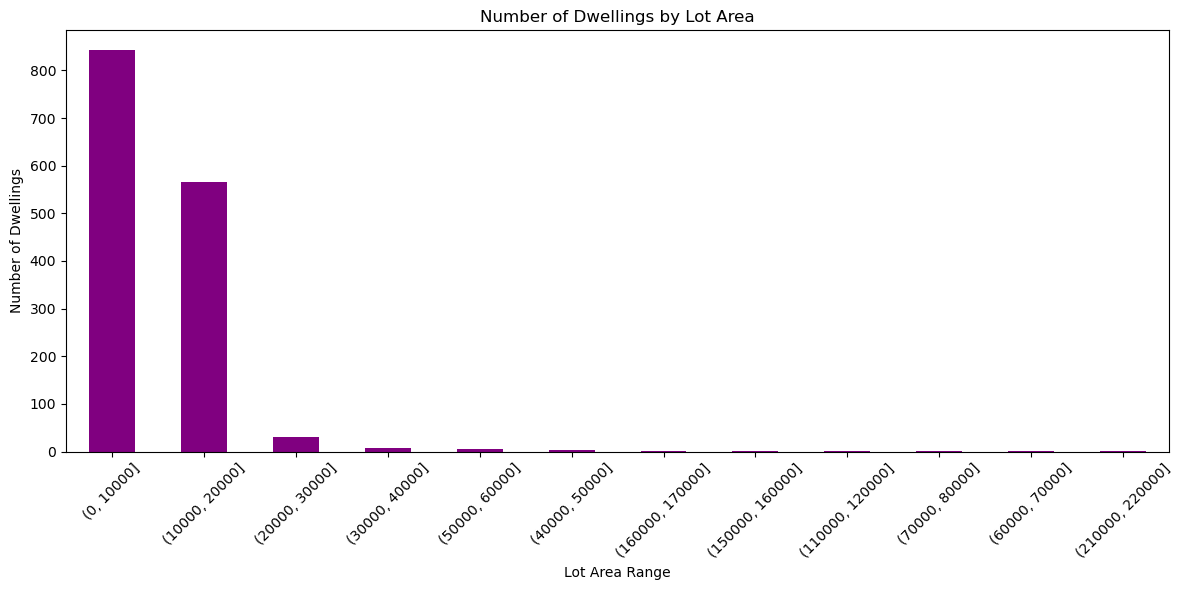

In [14]:
# Plot the number of dwellings by lot area but only include values greater than zero
area_df = area_df[area_df["Count"] > 0]

plt.figure(figsize=(12, 6))
area_df["Count"].plot(kind="bar", color="purple")
plt.title("Number of Dwellings by Lot Area")
plt.xlabel("Lot Area Range")
plt.ylabel("Number of Dwellings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most of the dwellings lot area fall between 0–10,000 sq ft and 10,000–20,000 sq ft. Beyond 20,000 sq ft, the number of dwellings drops rapidly showcasing how rare these type of dwellings are.

What is the distribution of sale prices?

In [15]:
prices = train_df["SalePrice"].value_counts().to_frame()

prices

,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13
...,...
202665,1
164900,1
208300,1


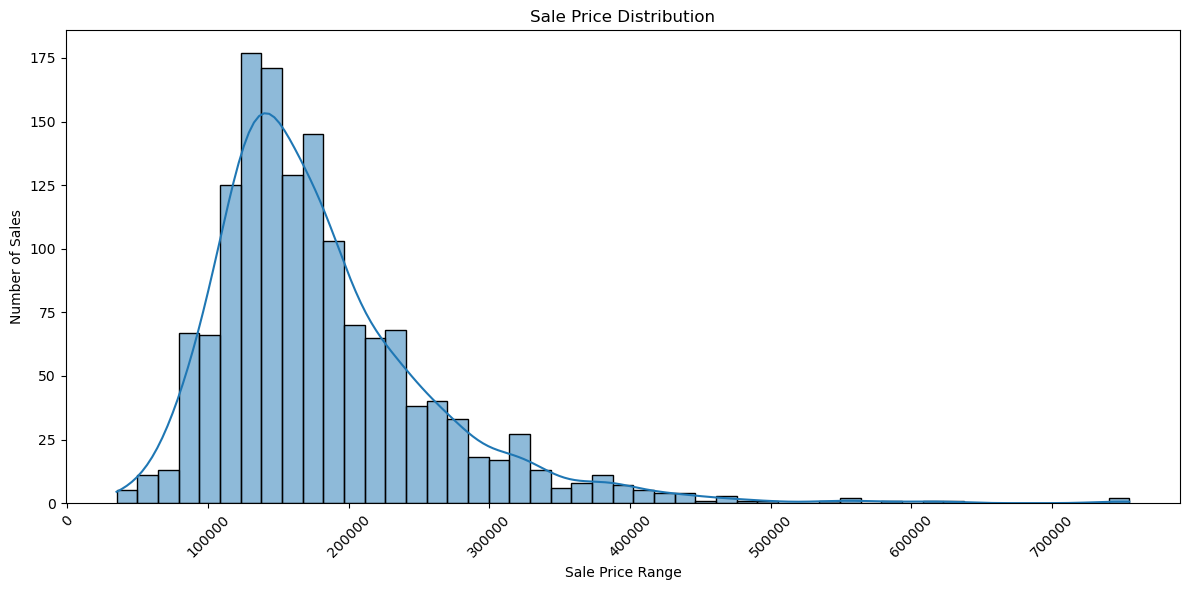

In [16]:
# Plot sale prices
plt.figure(figsize=(12, 6))
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price Range")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority of the dwellings fall in the price range between $100,000 and $200,000. There are only 4 houses higher than 600,000 which could be outliers.

## 2. Bivariate Analysis 

How does the type of dwelling effect the sale price?

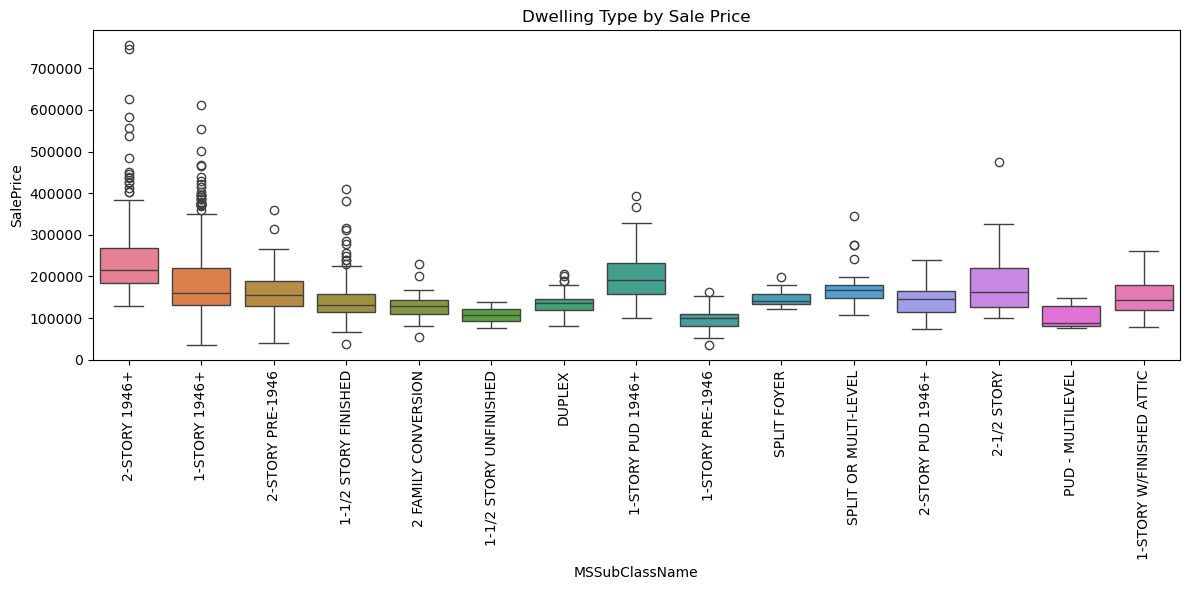

In [17]:
# Plot Dwelling Type vs SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x="MSSubClassName", y="SalePrice", hue="MSSubClassName")
plt.title("Dwelling Type by Sale Price") 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most homes sold are 1 & 2-story 1946 and newer in the $100,000 – $300,000 range. Older, converted, or multifamily dwellings cluster below $100,000. Some types such as Split-levels, Duplexes are minor dwellings in this market. Outliers are present across several categories, most notably in the 2-story and PUD homes, suggesting the existence of high-end or custom-built properties that command premium prices. 

How does the lot area effect the sale price?

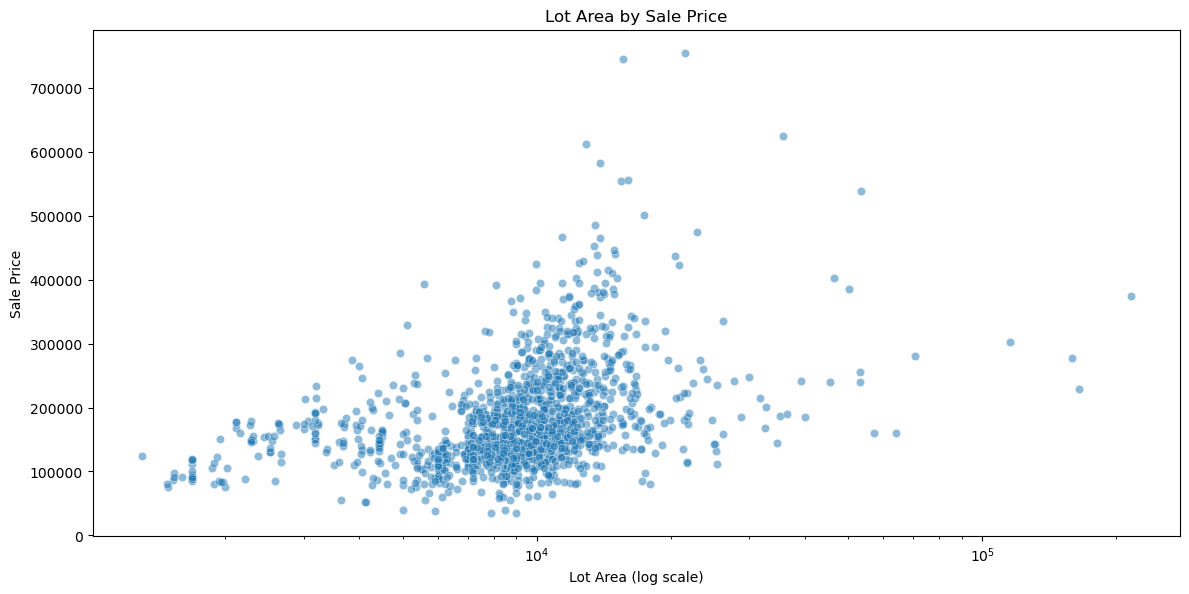

In [18]:
# Plot lot area by sale price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_df, x="LotArea", y="SalePrice", alpha=0.5)
plt.title("Lot Area by Sale Price")
plt.xlabel("Lot Area (log scale)")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.xscale("log")
plt.show()

There’s a loose upward trend. Larger lot sizes only slightly increase SalePrice. Most dwellings fall in the range of 6,000 - 12,000 sq ft , where the price varies mostly between $100,000 and $300,000

## 3. Multivariate Analysis 

What numeric features correlate with sale price?

In [19]:
# Drop all columns that wasn't apart of original dataset
train_df = train_df.drop(columns=["MSSubClassName", "Area"])

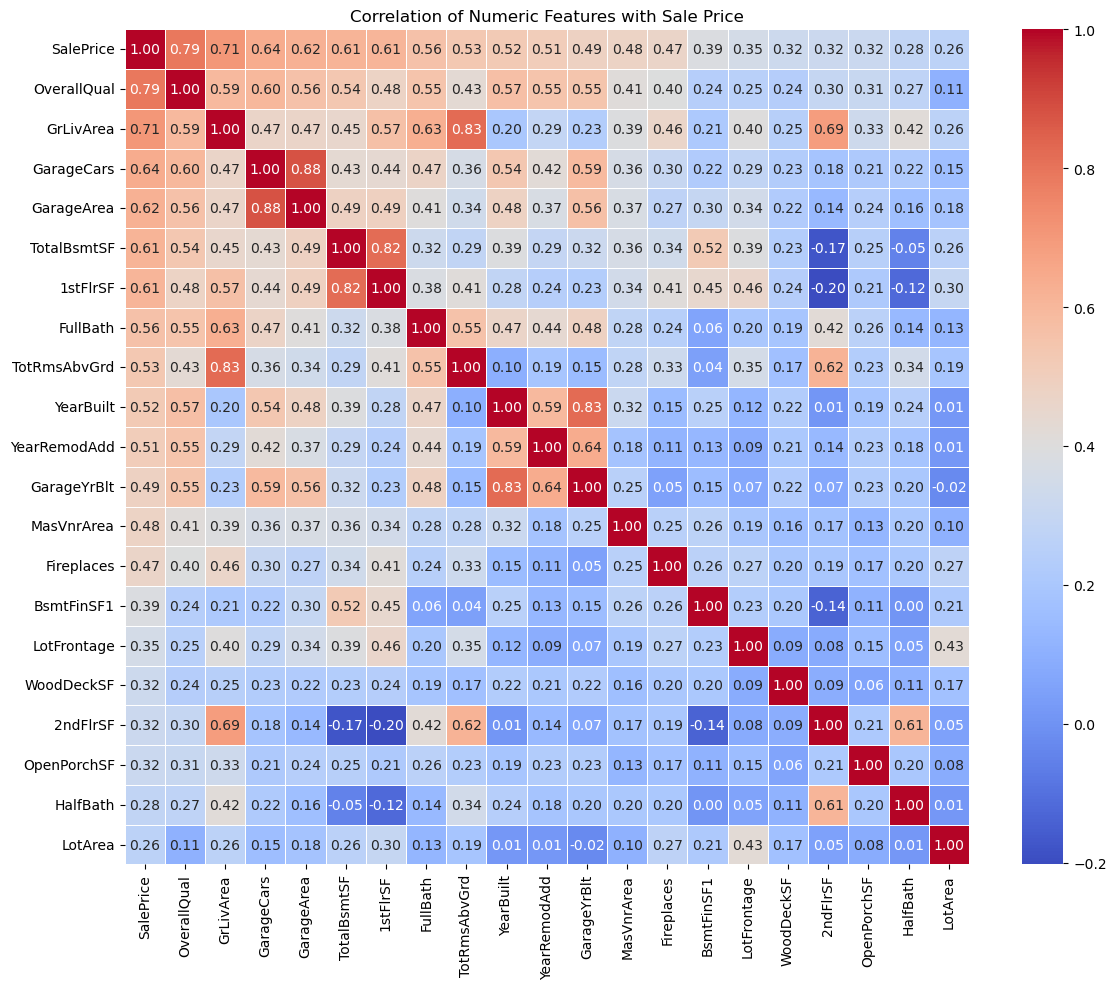

In [22]:
# Select only numerical columns for correlation
numeric_cols = train_df.select_dtypes(include=["number"]).columns
corr = train_df[numeric_cols].corr()

# Sort values using Sale Price from highest to lowest
corr = corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False)

# Select only the features correlatiion > 0.25 to Sale Price
top_corr = corr.index[abs(corr["SalePrice"]) > 0.25]
corr25 = train_df[top_corr].corr()

# Heatmap of correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(corr25, annot=True, cmap="coolwarm",  fmt=".2f", linewidths=0.5)
plt.title("Correlation of Numeric Features with Sale Price")
plt.tight_layout()
plt.show()

Red (closer to 1.0): Strong positive correlation (as one feature increases, so does SalePrice).
Blue (closer to -1.0): Strong negative correlation (as one feature increases, SalePrice decreases).

The strongest correlation of sale price is OverallQual (0.79), GrLivArea (0.71), GarageCars (0.64), GarageArea(0.62), TotalBsmt (0.61) and 1stFlrsf (0.61). Will select the numeric features >= 0.4 for modeling.

GarageCars & GarageArea (0.88) are very highly correlated as well as 1stFlrSF & TotalBsmtSF (0.83) and YearBuilt & GarageYrBuilt (0.83). This is likely multicollinear; will only use one of each in model.



 What features should I use to predict sale price?

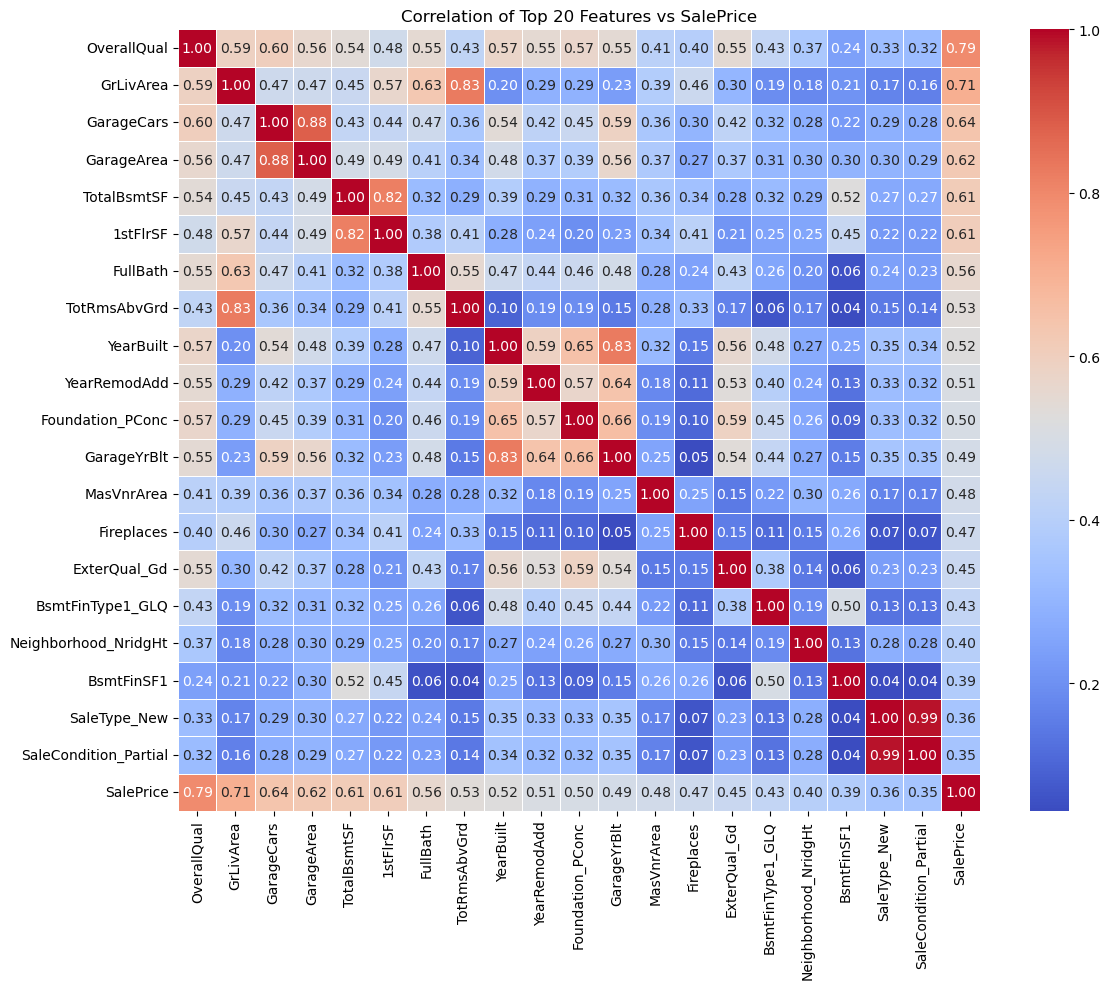

In [23]:
# One-hot encode all categorical columns 
train_encoded = pd.get_dummies(train_df, drop_first=True)
corr = train_encoded.corr()

# Sort all features that correlate with SalePrice and then drop it
corr = corr["SalePrice"].sort_values(ascending=False)
corr = corr.drop("SalePrice")

# Select the top 20 features to SalePrice
top20 = corr.nlargest(20).index.tolist()
features = top20 + ["SalePrice"]
corr20 = train_encoded[features].corr()

# Heatmap of correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr20, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Top 20 Features vs SalePrice")
plt.tight_layout()
plt.show()

The features that has the best predictive value towards Sale Price and aren't multicollinear is  OverallQual (0.79), GrLivArea (0.71), GarageCars (0.64), 1stFlrSF (0.61), FullBath (0.56), TotRmsAbvGrd (0.53), YearBuilt (0.52), YearRemodAdd (0.51), Foundation_PConc (0.50), MasVnrArea (0.48), Fireplaces (0.47), ExterQual_Gd (0.45), BsmtFinType1_GLQ (0.43) and Neighborhood_NridgHt (0.40). 

## Hypothesis Based off Graphs 

Majority of the dwellings will fall between the $100,000 - $300,000 price range. Homes with higher overall quality (OverallQual) will have significantly higher sale prices.